In [1]:
#import library
import pandas as pd
import numpy as np

#library visualisasi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# {Pemisah data
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# performa data
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

#warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
#import dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin/breast cancer.csv
/kaggle/input/breast-cancer-wisconsin/Breast Cancer Dignostics.ipynb


In [3]:
# Dataframe datasets
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin/breast cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
nRow, nCol= df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 569 rows and 33 columns


In [5]:
#Nama kolom pada dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
#Melihat statistik dalam dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
#Mencari data duplikat
df.duplicated().sum()

0

In [8]:
#Info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#Mencetak semua data unique pada setiap kolom
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [10]:
#Mencari data yang hilang pada datasets
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
#Drop semua data kosong yang ditempatkan pada kolom unnammed 32
df.drop(['id', 'Unnamed: 32'], axis=1, inplace = True)

In [12]:
#Cek ulang drop kolom
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

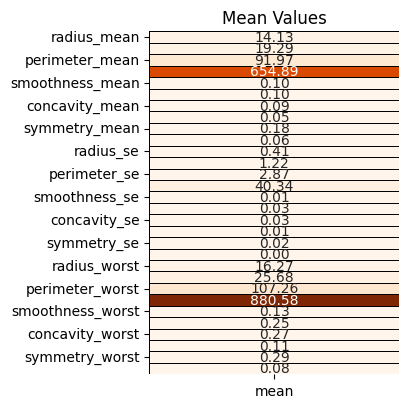

In [13]:
#Mencari means

#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5)): 
#Kode ini membuat sebuah objek gambar (fig) dan satu sumbu (ax) dengan ukuran 5x5 inci. 
#Ini akan digunakan untuk menampung visualisasi yang akan dibuat.
fig, ax = plt.subplots(nrows =1, ncols=1, figsize =(5,5))
#Memberi warna 
colors = ['#FF781F','#2D2926']

#Memberi rincian teks
plt.subplot(1,1,1)
#visualisasi data 
sns.heatmap(df.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

#df Padding
fig.tight_layout(pad = 4)

Kode di atas adalah bagian dari sebuah script Python yang menggunakan library matplotlib dan seaborn untuk membuat visualisasi data. Mari kita jelaskan setiap baris kode secara lengkap:

1. `fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))`: Kode ini membuat sebuah objek gambar (`fig`) dan satu sumbu (`ax`) dengan ukuran 5x5 inci. Ini akan digunakan untuk menampung visualisasi yang akan dibuat.

2. `colors = ['#FF781F', '#2D2926']`: Ini adalah daftar warna yang akan digunakan dalam visualisasi.

3. `plt.subplot(1,1,1)`: Ini mengatur subplot yang berada di posisi (1,1) pada grid subplot. Namun, sebelumnya kita sudah menggunakan `plt.subplots()` untuk membuat subplot, jadi ini sebenarnya tidak perlu dilakukan di sini.

4. `sns.heatmap(df.describe().T[['mean']], cmap='Oranges', annot=True, fmt='.2f', linecolor='black', linewidths=0.4, cbar=False)`: Ini adalah kode yang sebenarnya membuat visualisasi. Ini menggunakan seaborn untuk membuat sebuah heatmap dari data statistik deskriptif tentang rata-rata (mean) dari DataFrame `df`. Ini menetapkan colormap (peta warna) 'Oranges', menambahkan anotasi (nilai pada sel), dan mengatur format nilai dengan dua angka di belakang koma. Parameter lain seperti `linecolor`, `linewidths`, dan `cbar` mengatur warna garis antara sel, lebar garis, dan apakah ingin menampilkan colorbar (cbar) atau tidak.

5. `plt.title('Mean Values')`: Ini memberi judul plot dengan teks 'Mean Values'.

6. `fig.tight_layout(pad=4)`: Ini mengatur jarak antara subplot dan tepi gambar dengan jarak 4 inci.

Jadi, keseluruhan kode ini menghasilkan sebuah heatmap yang menunjukkan nilai rata-rata dari DataFrame `df` dengan menggunakan warna dari colormap 'Oranges', dengan anotasi nilai di setiap sel, dan diberi judul 'Mean Values'.


In [14]:
#Mencari data sesuai kategori type data
# categorical and numerical features
col = list(df.columns)
col.remove('diagnosis')
categorical_features = ['diagnosis']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : diagnosis
Numerical Features : radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst


In [15]:
#Menghitung data pada kolom diagnosis
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [16]:
#Labeling data sesuai dengan value, malignant = 1, benign = 0
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis']


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [17]:
#### SESI EXPLORATORY DATA ####

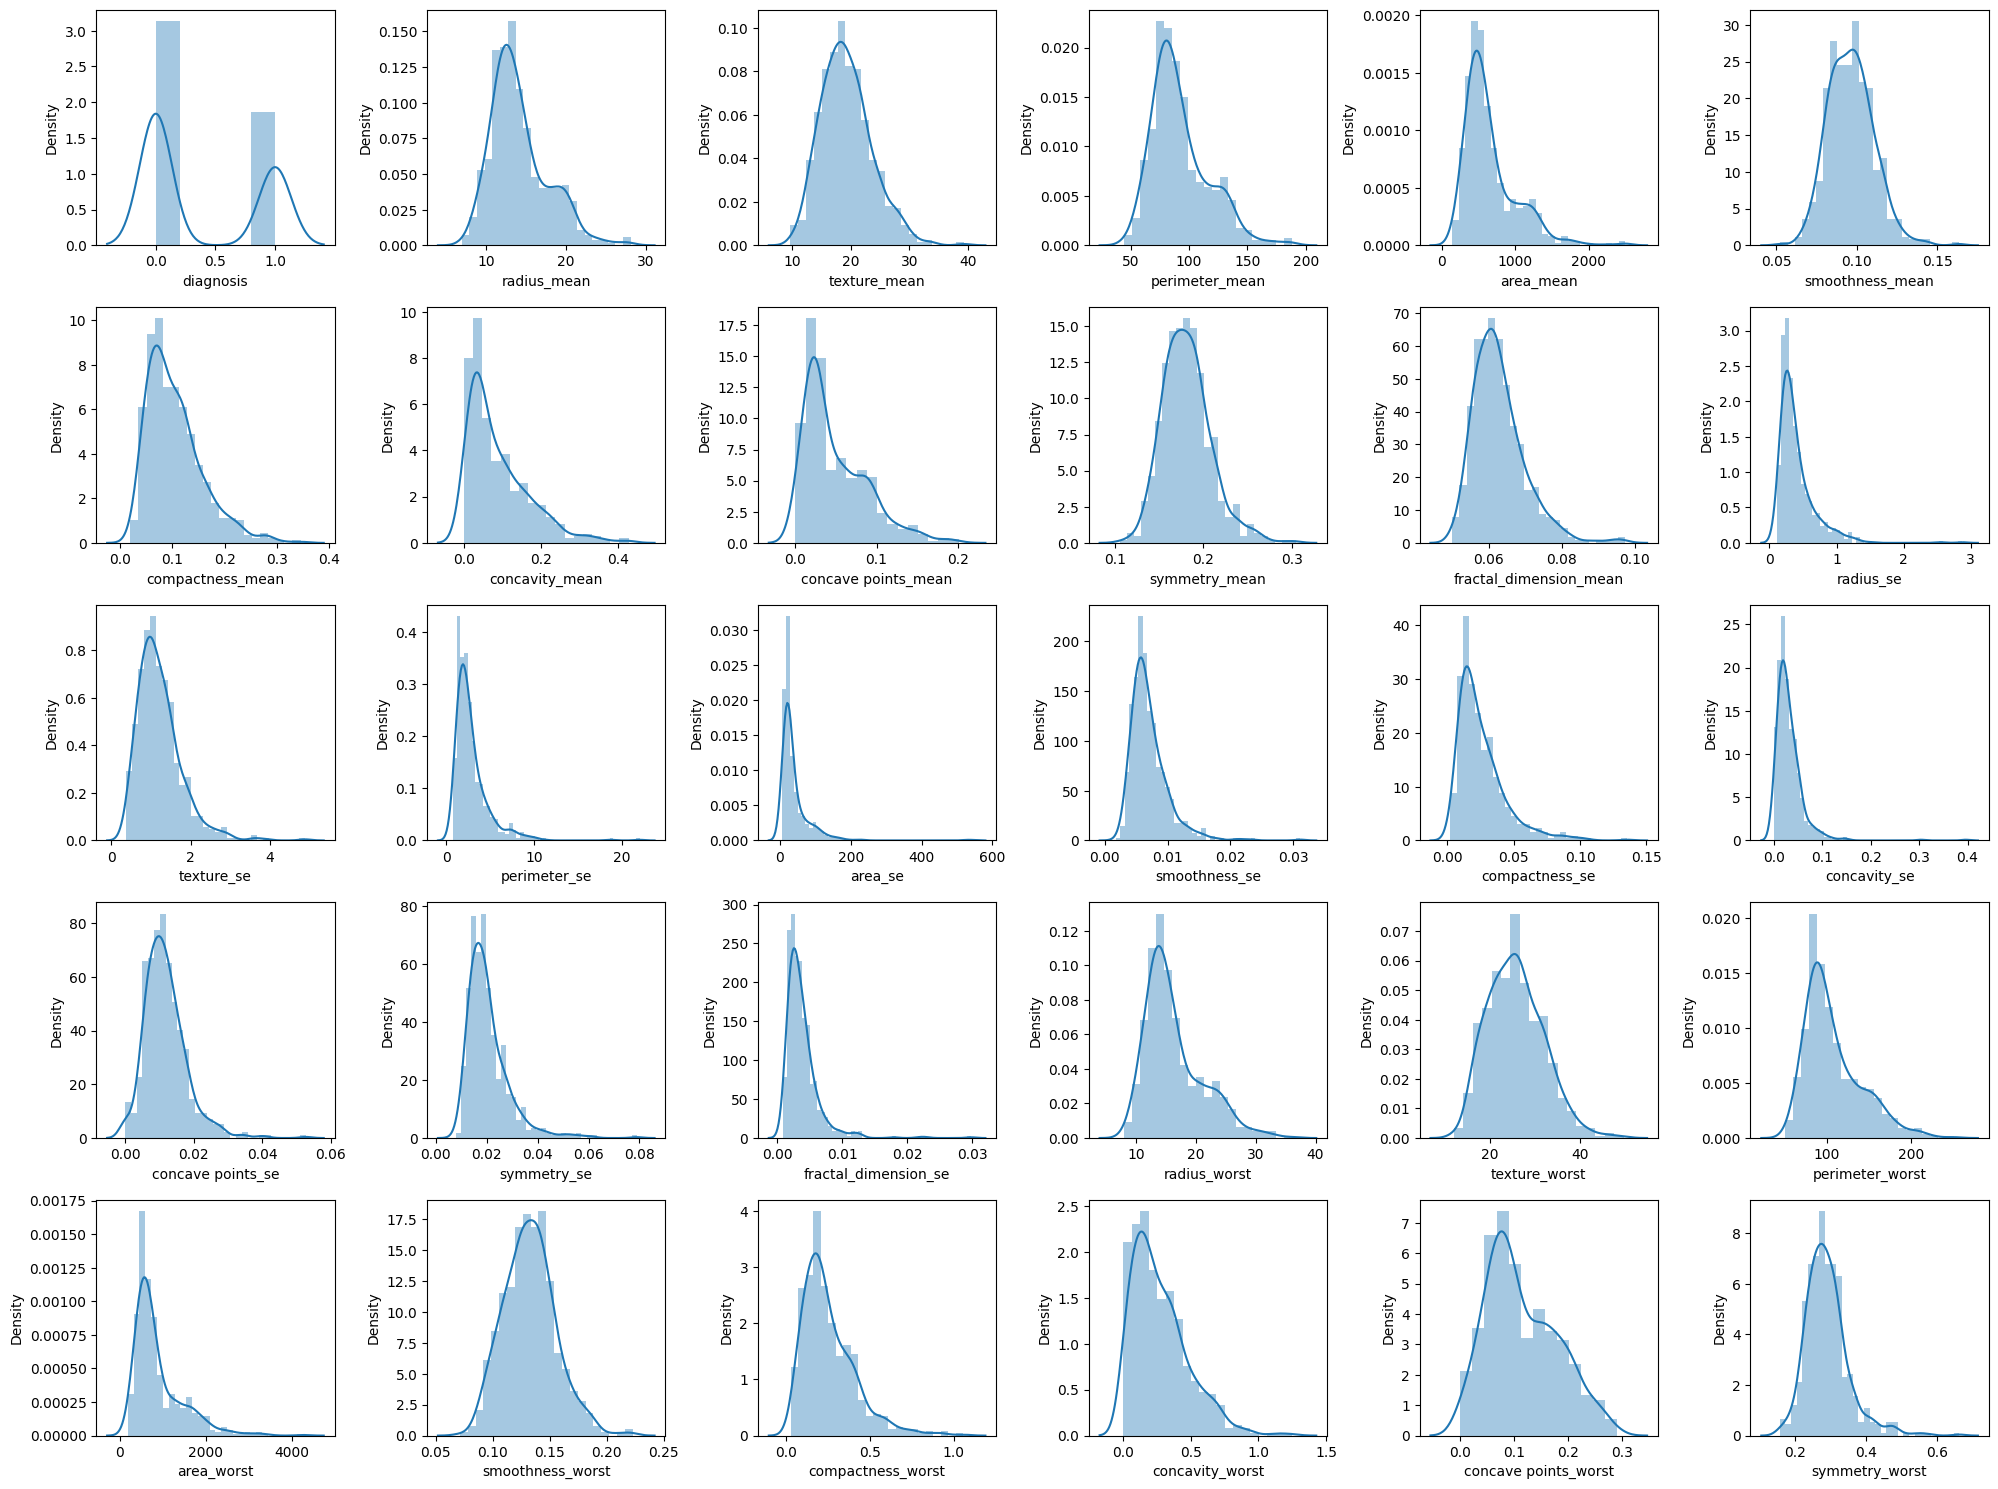

In [18]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Kode di atas digunakan untuk membuat subplot grid yang berisi distribusi dari setiap kolom dalam DataFrame `df`. Mari kita jelaskan baris per baris:

1. `plt.figure(figsize=(20, 15))`: Ini membuat sebuah gambar (figure) dengan ukuran 20x15 inci. Ini adalah ukuran total gambar yang akan menampung seluruh subplot.

2. `plotnumber = 1`: Ini menginisialisasi variabel `plotnumber` yang akan digunakan untuk mengatur nomor subplot.

3. `for column in df:`: Ini adalah loop yang akan mengiterasi melalui setiap kolom dalam DataFrame `df`.

4. `if plotnumber <= 30:`: Ini adalah kondisi untuk memeriksa apakah `plotnumber` masih kurang dari atau sama dengan 30. Ini dilakukan untuk membatasi jumlah subplot maksimum menjadi 30.

5. `ax = plt.subplot(5, 6, plotnumber)`: Ini membuat sebuah subplot dengan ukuran 5 baris dan 6 kolom. Parameter ketiga adalah nomor subplot yang sedang diproses. Variabel `plotnumber` digunakan di sini untuk memastikan subplot ditambahkan secara berurutan.

6. `sns.distplot(df[column])`: Ini menggunakan seaborn untuk membuat distribusi (histogram) dari nilai-nilai dalam kolom `column` dari DataFrame `df`.

7. `plt.xlabel(column)`: Ini menambahkan label sumbu x pada subplot yang menunjukkan nama kolom dari DataFrame `df` yang sedang diproses.

8. `plotnumber += 1`: Ini menambahkan 1 ke nilai `plotnumber`, sehingga iterasi berikutnya akan menghasilkan subplot berikutnya.

9. `plt.tight_layout()`: Ini mengatur layout subplot secara otomatis agar tidak tumpang tindih atau bertabrakan.

10. `plt.show()`: Ini menampilkan gambar yang berisi semua subplot yang telah dibuat.

Jadi, keseluruhan kode tersebut menghasilkan grid subplot yang menampilkan distribusi dari setiap kolom dalam DataFrame `df`, dengan batasan maksimum 30 subplot. Setiap subplot menunjukkan histogram dari nilai-nilai dalam kolom yang bersangkutan.